### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline 
plt.rcParams['figure.figsize']=(8,5)

### Analyzing the Dataset

In [2]:
df = pd.read_csv('../input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.shape)

(891, 12)


Our target variable is Survived


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Need to convert datatypes accordingly

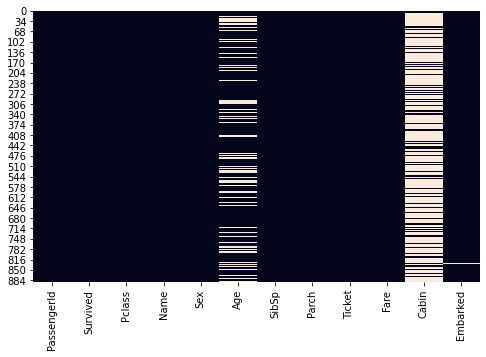

In [5]:
sns.heatmap(df.isnull(), cbar = False)
plt.show()

Dropping the insignificant variables


In [6]:
df.drop(["Cabin","Name","PassengerId","Ticket"],axis = 1,inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
df["Sex"] = df["Sex"].astype(str)
df["Embarked"] = df["Embarked"].astype(str)

### Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


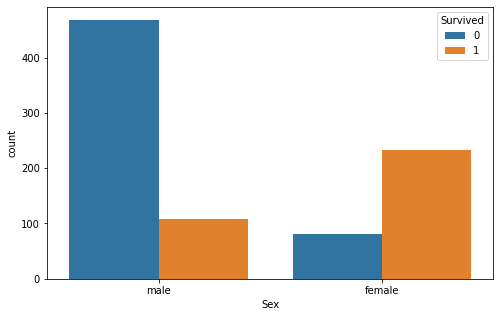

In [8]:
sns.countplot("Sex", data = df, hue ="Survived")
plt.show()    

0 - Not Survived , 1 - Survived

From the above plot we come to know that number of female's were survived when compared to male.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


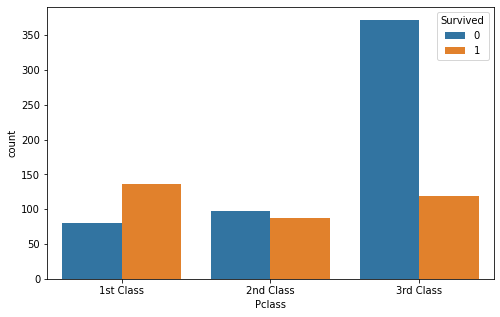

In [9]:
x= [0,1,2]
sns.countplot("Pclass", data = df, hue ="Survived")
labels = ["1st Class","2nd Class","3rd Class"]
plt.xticks(x, labels)
plt.show()    


0 - Not Survived, 1 - Survived

From the above plot we come to know that the people in 1st Class were mostly survived and people in 3rd class were mostly lost their life

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


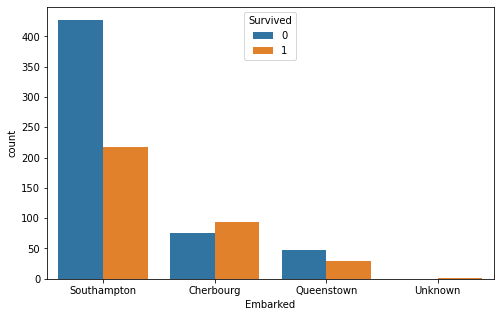

In [10]:
x = [0,1,2,3]
sns.countplot("Embarked", data = df, hue ="Survived")
labels = ["Southampton","Cherbourg", "Queenstown", "Unknown"]
plt.xticks(x,labels)
plt.show()    

### Encoding 

In [11]:
le = LabelEncoder()

In [12]:
for val in df.columns:
    if df[val].dtype == "O":
        df[val] = le.fit_transform(df[val])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [13]:
def fillmissing_val(col):
    mean = col.mean()
    col.fillna(mean, inplace = True)
fillmissing_val(df["Age"])
fillmissing_val(df["Fare"])
fillmissing_val(df["Embarked"])

In [14]:
df["Age"] = np.round(df["Age"])
df["Age"] = df["Age"].astype(int)

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

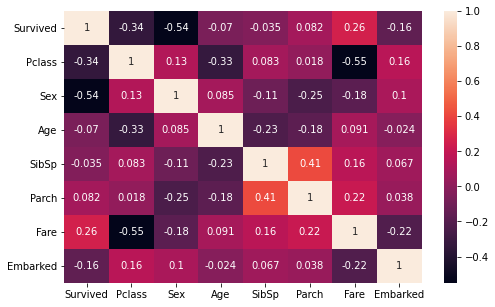

In [16]:
correlation = df.corr()
sns.heatmap(correlation,annot = True)
plt.show()

Fare has the highest correlation with survived variable

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


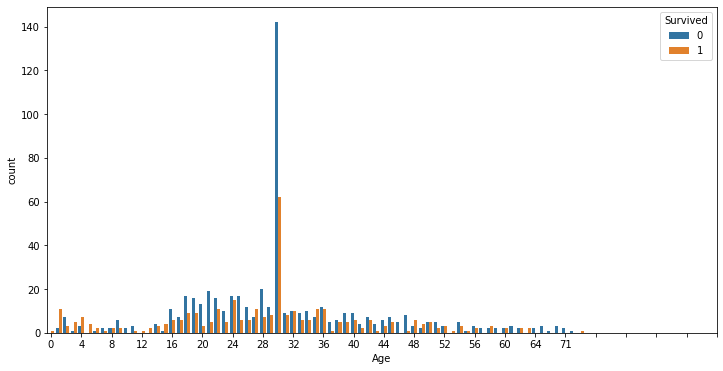

In [17]:
plt.figure(figsize=(12,6))
sns.countplot("Age",data = df, hue = "Survived")
plt.xticks(range(0,90,4))
plt.show()    

0 - Not Survived, 1 - Survived
From the above chart we come to know that the people between the 28 to 32 were survived the most.

### Train Test and Split

In [18]:
X = df.drop(columns = "Survived",axis =1)
Y = df["Survived"]

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2, random_state = 0)

### Linear Regression

In [20]:
model = LinearRegression()

##### Train Module

In [21]:
model.fit(xtrain,ytrain) 
xtrain_predict = model.predict(xtrain)
xtrain_predict = np.round(xtrain_predict).astype(int)

train_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
train_predict.tail()

,Predicted Value,Actual Value
835,1,1
192,1,1
629,0,0
559,1,1
684,0,0


In [22]:
train_accuracy = accuracy_score(xtrain_predict,ytrain)
print(train_accuracy)

0.8033707865168539


##### Test module

In [23]:
xtest_predict = model.predict(xtest)
xtest_predict = np.round(xtest_predict).astype(int)

test_predict = pd.DataFrame({"Predicted Value" : xtest_predict,
                              "Actual Value" : ytest
})
test_predict.head()

,Predicted Value,Actual Value
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1


In [24]:
test_accuracy = accuracy_score(xtest_predict,ytest)
print(test_accuracy)

0.7877094972067039


### Thank You !!!